#### There are total 309 instances with 16 independent predictor variable and one target variable Lung_cancer.

In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = (15,6)
from scipy.stats import skew
import pylab as p
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.preprocessing import LabelEncoder
from numpy import NaN
%matplotlib inline
import random
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("survey lung cancer.csv")
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
data.shape #dimension of the data(rows,columns)

(309, 16)

In [4]:
data.info

<bound method DataFrame.info of     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1    

In [5]:
data.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

## ATTRIBUTE INFORMATION

In [6]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [7]:
att=data[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']]
for i in att:
    print(i,"\n",att[i].unique())

GENDER 
 ['M' 'F']
AGE 
 [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
SMOKING 
 [1 2]
YELLOW_FINGERS 
 [2 1]
ANXIETY 
 [2 1]
PEER_PRESSURE 
 [1 2]
CHRONIC DISEASE 
 [1 2]
FATIGUE  
 [2 1]
ALLERGY  
 [1 2]
WHEEZING 
 [2 1]
ALCOHOL CONSUMING 
 [2 1]
COUGHING 
 [2 1]
SHORTNESS OF BREATH 
 [2 1]
SWALLOWING DIFFICULTY 
 [2 1]
CHEST PAIN 
 [2 1]
LUNG_CANCER 
 ['YES' 'NO']


## Checking For Missing value

In [8]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

#### Observation: we observe that there is no missing value in this dataset.

## Dublicate Values

In [9]:
dup=data.duplicated().sum()
print(dup)

33


#### Observation:We observe that there are 33 dublicate values.

In [10]:
x=data['LUNG_CANCER'].value_counts()
c1=['grey','blue']
x.plot.pie(autopct='%1.3f%%',colors=c1,startangle=90,radius=0.5)##write the numeric value 
plt.title("LUNG_CANCER",
          fontdict={'name':'Algerian','size':30,'color':green'})
plt.show()

SyntaxError: EOL while scanning string literal (1630602364.py, line 5)

#### here we observe that 87.379% of people have risk on lung cancer based on the given features and 12.621 of people have no risk on lung cancer

In [ ]:
sns.barplot(data['LUNG_CANCER'],data['AGE'],palette="Paired")
plt.show()

## Checking For Outliers

In [ ]:
data.boxplot(grid=False, rot=80, fontsize=9) 
#boxplot of each varible together

#### Observation: We observe that there are outliers in age and no other variables has a outliers.

## Detect Outlier

### Median Imputation

In [ ]:
q1=data['AGE'].quantile(0.25)
q3=data['AGE'].quantile(0.75)

iqr=q3-q1

lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr

print(lower_trial)
print(upper_trial)

In [ ]:
q1=data['AGE'].quantile(0.25)
q3=data['AGE'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(data['AGE'])
for i in data['AGE']:
    if i>upper_trial or i<lower_trial:
        data['AGE']=data['AGE'].replace(i,med)
sns.boxplot(data['AGE'])
plt.title("box plot after median imputation")
plt.show()


#### Observation: Outliers are treated

## Checking For Skewness

ValueError: could not convert string to float: 'YES'

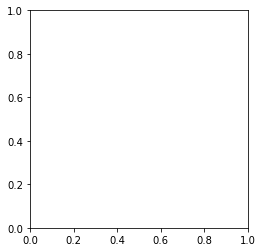

In [12]:
y = data["LUNG_CANCER"]

plt.pie(y)
plt.show() 

In [147]:
data.skew(axis=0,skipna=True)

AGE                      0.062706
SMOKING                 -0.255705
YELLOW_FINGERS          -0.282425
ANXIETY                  0.006504
PEER_PRESSURE           -0.006504
CHRONIC DISEASE         -0.019513
FATIGUE                 -0.741836
ALLERGY                 -0.229118
WHEEZING                -0.229118
ALCOHOL CONSUMING       -0.229118
COUGHING                -0.322786
SHORTNESS OF BREATH     -0.589714
SWALLOWING DIFFICULTY    0.123812
CHEST PAIN              -0.229118
dtype: float64

#### Observation: : Here we observe that the skewness value for Age is 0.068544 and value for Shortness of Breath which is below -0.5, so it is Negatively Skewed.

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

## Categorical Data

In [149]:
#data_cat = data.select_dtypes(object)
#data_cat


## Numerical Data

In [150]:
data_num = data.select_dtypes(["int64","float64"])
data_num


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2


## Converting Categorical Data Into Numerical Data:


In [151]:
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES':1,'NO':0})
data['LUNG_CANCER']

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [152]:
data['GENDER'] = data['GENDER'].map({'M':1,'F':0})
data['GENDER']

0      1
1      1
2      0
3      1
4      0
      ..
304    0
305    1
306    1
307    1
308    1
Name: GENDER, Length: 309, dtype: int64

<AxesSubplot:xlabel='GENDER', ylabel='LUNG_CANCER'>

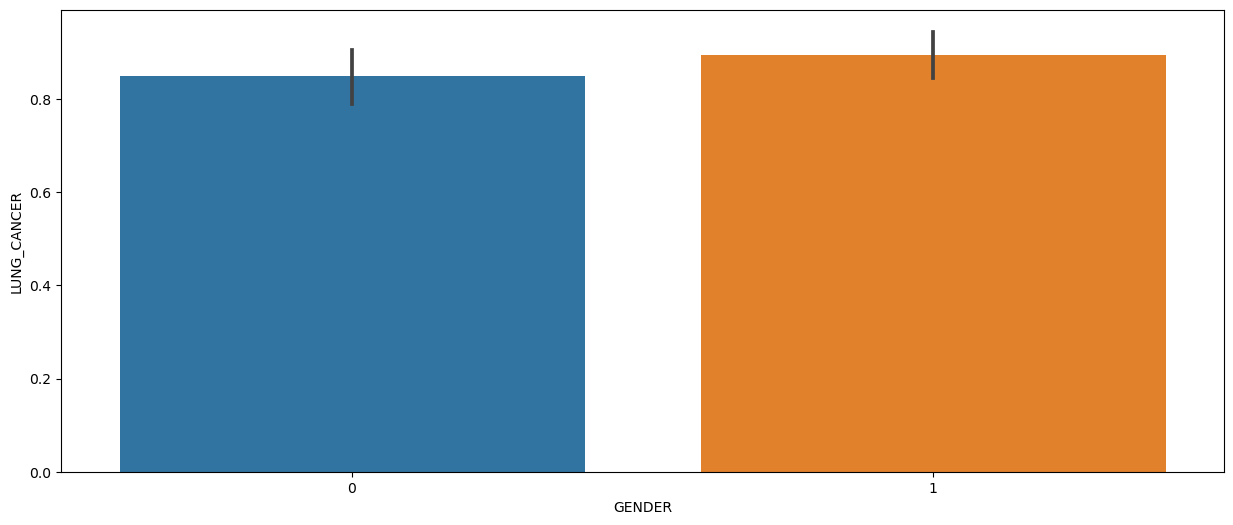

In [153]:
ax=sns.barplot(data['GENDER'],data['LUNG_CANCER'])
ax

In [154]:
#from sklearn.preprocessing import LabelEncoder

#enc=LabelEncoder()#enc is object of the class labelencoder

#data['YELLOW_FINGERS']=enc.fit_transform(data['YELLOW_FINGERS']) #it'll create extra column
#data.head()

In [155]:
#data['ANXIETY']=enc.fit_transform(data['ANXIETY']) #it'll create extra column
#data.head()

In [156]:
#data.columns

In [157]:
#data['PEER_PRESSURE']=enc.fit_transform(data['PEER_PRESSURE']) #it'll create extra column
#data.head()

In [158]:
#data['CHRONIC DISEASE']=enc.fit_transform(data['CHRONIC DISEASE']) #it'll create extra column
#data.head()

In [159]:
#data.columns

In [160]:
#data['FATIGUE ']=enc.fit_transform(data['FATIGUE '])
#data['ALLERGY ']=enc.fit_transform(data['ALLERGY '])
#data['WHEEZING']=enc.fit_transform(data['WHEEZING'])
#data['ALCOHOL CONSUMING']=enc.fit_transform(data['ALCOHOL CONSUMING'])#it'll create extra column
#data['COUGHING']=enc.fit_transform(data['COUGHING'])
#data['SHORTNESS OF BREATH']=enc.fit_transform(data['SHORTNESS OF BREATH'])
#data['SWALLOWING DIFFICULTY']=enc.fit_transform(data['SWALLOWING DIFFICULTY'])
#data['CHEST PAIN']=enc.fit_transform(data['CHEST PAIN'])

#data.head()

In [161]:
#data

## Skewness

In [162]:
#for col in data_num:
    #print(col)
    #print(skew(data_num[col]))
    
    #plt.figure()
    #sns.distplot(data_num[col])
    #plt.show()

## Correlation

In [163]:
data_num.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.086005,-0.005501,0.029305,-0.007499,0.013566,0.032392,0.054056,0.048147,0.032109,0.168913,0.001807,-0.026978,-0.029511
SMOKING,-0.086005,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,-0.005501,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,0.029305,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,-0.007499,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,0.013566,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,0.032392,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.054056,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,0.048147,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
ALCOHOL CONSUMING,0.032109,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


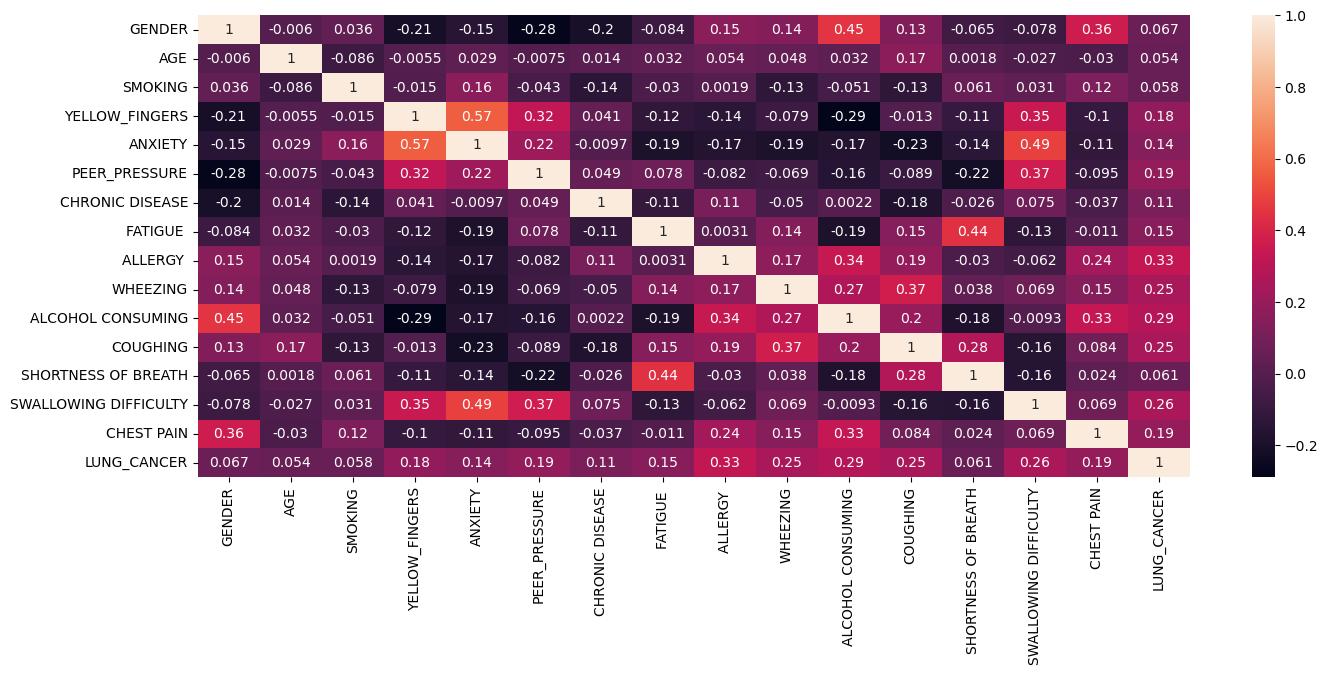

In [164]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Observation: Since there is no strong correlation between the variables there is no collinearity.

## Standardization

In [165]:

#data = (data - data.mean())/data.std()
#data

In [166]:
a=data.columns
a

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [167]:
#from sklearn import preprocessing
#import pandas as pd
#d = preprocessing.normalize(data)
#scaled_df = pd.DataFrame(d, columns=a)
#scaled_df.head()

## MinMax Normalization

In [168]:
#from sklearn import preprocessing

#scaler = preprocessing.MinMaxScaler()
#names = data.columns
#d = scaler.fit_transform(data)
#data = pd.DataFrame(d, columns=names)
#data.head()

## Normalization

In [169]:
#data =(data-data.min())/(data.max() - data.min())
#data


## Class Imbalance

### Oversampling Using Smote

###### SMOTE(Syntax Minority Oversampling Technique) is one of the most commonly used oversampling methods to solve the imbalanceproblem. It aims to balance class distibution by randomly increasing minority class examples by replicating them.


### Checking For Class Imbalance

In [170]:
data['LUNG_CANCER'].value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

#### Observation: There is a class imbalnce in the target variable

### Balancing The Class

In [128]:
data.dtypes

GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int64
dtype: object

In [129]:
#data = pd.get_dummies(data)

In [130]:
data.dtypes

GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int64
dtype: object

In [131]:
q = data.drop(['LUNG_CANCER'],axis=1)
w = data['LUNG_CANCER']

print(q.shape)
print(w.shape)

(309, 15)
(309,)


In [132]:
q = data.drop(['LUNG_CANCER'],axis=1)
w = data['LUNG_CANCER']
q_resampled, w_resampled = SMOTE().fit_resample(q,w)
#X, y = SMOTE().fit_resample(q,w)

In [45]:
q_resampled.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

In [46]:
data.value_counts()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER
0       65   2        2               2        2              1                2         1         2         1                  2         2                    2                      1           1              2
        56   1        1               1        2              2                2         1         1         2                  2         2                    2                      1           1              2
        63   1        1               1        1              2                2         1         1         1                  1         2                    1                      1           0              2
1       67   2        1               2        1              1                2         2         1         2                  2         2                    1 

#### Observation: Here the target variable classes are balanced.


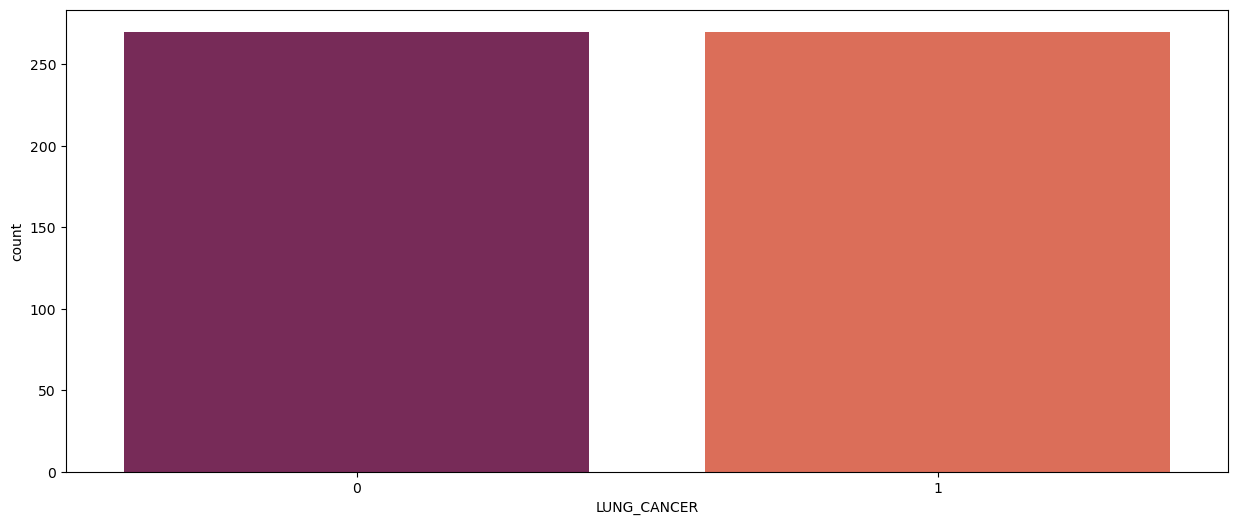

In [47]:
sns.countplot(w_resampled ,label='counts',palette='rocket')
plt.show()

In [48]:
data.to_csv("final_eda.csv",index=False)

In [49]:
q_resampled.shape

(540, 15)

In [50]:
w_resampled.shape

(540,)

## Classification

In [51]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [52]:
X=data[['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN','GENDER']]
y=data['LUNG_CANCER']

In [53]:
print(X.shape)
print(y.shape)

(309, 15)
(309,)


## standard scalar

In [54]:
#from sklearn.preprocessing import StandardScaler

#scale=StandardScaler()
#X_scale=scale.fit_transform(X)
#print(X_scale)
#print(type(scale))
#print(X_scale.shape)

#### Split Into Train And Test

In [55]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(q_resampled , w_resampled ,test_size=0.2,random_state=1)


In [56]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(432, 15)
(432,)
(108, 15)
(108,)


In [57]:
X_train.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
16,1,75,2,1,1,1,2,1,2,2,2,2,2,1,2
85,1,60,1,2,2,1,1,1,1,2,2,2,2,2,1
517,1,63,2,1,1,1,1,1,1,1,2,1,1,1,2


In [58]:
X_test.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
65,0,71,2,2,2,2,2,2,1,2,1,2,1,2,2
402,0,63,2,1,1,2,1,1,1,1,1,1,1,1,1
445,0,63,1,1,1,1,1,1,1,1,1,1,2,1,1


In [59]:
y_train.head(3)

16     1
85     1
517    0
Name: LUNG_CANCER, dtype: int64

In [60]:
y_test.head(3)

65     1
402    0
445    0
Name: LUNG_CANCER, dtype: int64

## Logistic Regression

In [61]:
#logistic regression-binary data
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
print("LR:",accuracy_score(y_test,y_pred)*100)

LR: 97.22222222222221


In [63]:
#confusion matrix which will tell where the machine gone wrong
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[56  2]
 [ 1 49]]


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        58
           1       0.96      0.98      0.97        50

    accuracy                           0.97       108
   macro avg       0.97      0.97      0.97       108
weighted avg       0.97      0.97      0.97       108



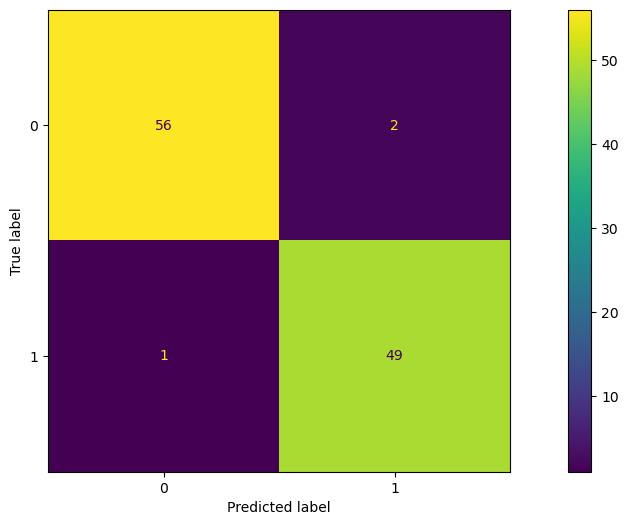

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd=ConfusionMatrixDisplay(cm,display_labels=lr.classes_)
cmd.plot()
#true_label-y_test,predicted label-y_pred

In [66]:
TP=float(input("TP:="))
FP=float(input("FP:="))
FN=float(input("FN:="))
TN=float(input("TN:="))
ACC=(TP+TN)/(TP+FP+FN+TN)
SEN=TP/(TP+FN)
SPEC=TN/(TN+FP)
prec=TP/(TP+FP)
fm=TP/(TP+((FP+FN)/2))
print("accuracy=",ACC,"\nsensitivity=",SEN,"\nspecificity=",SPEC)
print("prescion=",prec)
print("fmeasure=",fm)

KeyboardInterrupt: Interrupted by user

## KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print(accuracy_score(y_test,y_pred)*100)

In [ ]:
#confusion matrix which will tell where the machine gone wrong
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd=ConfusionMatrixDisplay(cm,display_labels=knn.classes_)
cmd.plot()

In [ ]:
TP=float(input("TP:="))
FP=float(input("FP:="))
FN=float(input("FN:="))
TN=float(input("TN:="))
ACC=(TP+TN)/(TP+FP+FN+TN)
SEN=TP/(TP+FN)
SPEC=TN/(TN+FP)
prec=TP/(TP+FP)
fm=TP/(TP+((FP+FN)/2))
print("accuracy=",ACC,"\nsensitivity=",SEN,"\nspecificity=",SPEC)
print("prescion=",prec)
print("fmeasure=",fm)

## GuassianNB Classifier

In [ ]:
#guassianNB
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
cmd=ConfusionMatrixDisplay(cm,display_labels=gnb.classes_)
cmd.plot()

## Support Vector Classifier

In [ ]:
#support vector classifier
from sklearn.svm import SVC
sv=SVC(gamma='auto')
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd=ConfusionMatrixDisplay(cm,display_labels=sv.classes_)
cmd.plot()

In [ ]:
TP=float(input("TP:="))
FP=float(input("FP:="))
FN=float(input("FN:="))
TN=float(input("TN:="))
ACC=(TP+TN)/(TP+FP+FN+TN)
SEN=TP/(TP+FN)
SPEC=TN/(TN+FP)
prec=TP/(TP+FP)
fm=TP/(TP+((FP+FN)/2))
print("accuracy=",ACC,"\nsensitivity=",SEN,"\nspecificity=",SPEC)
print("prescion=",prec)
print("fmeasure=",fm)

## Decision Tree Classifier

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd=ConfusionMatrixDisplay(cm,display_labels=dt.classes_)
cmd.plot()

In [ ]:
TP=float(input("TP:="))
FP=float(input("FP:="))
FN=float(input("FN:="))
TN=float(input("TN:="))
ACC=(TP+TN)/(TP+FP+FN+TN)
SEN=TP/(TP+FN)
SPEC=TN/(TN+FP)
prec=TP/(TP+FP)
fm=TP/(TP+((FP+FN)/2))
print("accuracy=",ACC,"\nsensitivity=",SEN,"\nspecificity=",SPEC)
print("prescion=",prec)
print("fmeasure=",fm)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=rfc.classes_)
cmd.plot()

In [ ]:
TP=float(input("TP:="))
FP=float(input("FP:="))
FN=float(input("FN:="))
TN=float(input("TN:="))
ACC=(TP+TN)/(TP+FP+FN+TN)
SEN=TP/(TP+FN)
SPEC=TN/(TN+FP)
prec=TP/(TP+FP)
fm=TP/(TP+((FP+FN)/2))
print("accuracy=",ACC,"\nsensitivity=",SEN,"\nspecificity=",SPEC)
print("prescion=",prec)
print("fmeasure=",fm)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
from sklearn import metrics

lr= LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

sv=SVC(gamma='auto')
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="svc, AUC="+str(auc))

dtree=DecisionTreeClassifier()
dtree.fit(X_train.values,y_train.values)
y_pred=dtree.predict(X_test.values)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="dtree, AUC="+str(auc))

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="dtree, AUC="+str(auc))



plt.legend()

In [ ]:
TP=float(input("TP:="))
FP=float(input("FP:="))
FN=float(input("FN:="))
TN=float(input("TN:="))
ACC=(TP+TN)/(TP+FP+FN+TN)
SEN=TP/(TP+FN)
SPEC=TN/(TN+FP)
prec=TP/(TP+FP)
fm=TP/(TP+((FP+FN)/2))
print("accuracy=",ACC,"\nsensitivity=",SEN,"\nspecificity=",SPEC)
print("prescion=",prec)
print("fmeasure=",fm)

In [ ]:
data.head(30)

### here we observe that random forest model has higest  accuracy(94.44) than other.

In [ ]:
import pickle

In [ ]:
pickle.dump(lr,open('lungmodel.pkl','wb'))

In [ ]:
print(X.head(5))
print(y.head(5))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

data=[0,68,2,1,2,1,1,2,1,1,1,1,1,1,1]
model=pickle.load(open('lungmodel.pkl','rb')) #rb-read binary

import numpy as np
arr=np.array(data).reshape(1,-1)  #-1 means we don't know the exact col 

result=model.predict(arr)
print(result[0])